<a href="https://colab.research.google.com/github/ecandes/stat318/blob/master/Hard_Spheres.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model of hard spheres 

We have a graph $G$ in which a node can be occupied or not. A permissible configuration is such that no two adjacent nodes are simultaneously occupied. We are interested in getting a sample from the uniform distribution over all permissible configurations. 

We consider the Metropolis algorithm to do this: for $t = 1, \ldots$

- select a site uniformly at random 
- if the neighbors are free, set the value of the site to be that of fait bit
- else do nothing

We have seen in class that this iteration can be cast as a Metropolis algorithm. 




In [0]:
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

plt.rcParams["figure.figsize"] = (4,4)

We work with the square lattice for our graph $G$ represented below. 

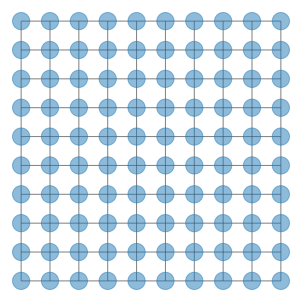

In [0]:
plt.rcParams["figure.figsize"] = (4,4)
L = 10
G = nx.grid_2d_graph(L,L)
nx.draw(G,pos=dict(zip(G.nodes.keys(),G.nodes.keys())),nodesize=150,alpha=0.5)
# nx.set_node_attributes(G, values = False, name="occupied")
# print(G.nodes.data())

In [0]:
class HardSpheres:

    def __init__(self, G, X=None):
        self.G = G                   # Underlying graph
        self.n = G.number_of_nodes()  # Number of nodes
        self.nodes = list(G.nodes.keys())  # List of nodes
        if X is None:
            X = np.zeros(self.n).astype(int)
        # Configuration : 0/1 = free/occupied site
        self.X = dict(zip(self.nodes, X))
        # Useful for plotting
        self.pos = dict(zip(self.nodes, self.nodes))

    def sumNeighbors(self, v):
        return np.sum(np.array([self.X[w] for w in self.G.neighbors(v)]))

    def sum(self):
        return np.array(list(self.X.values())).sum()

    def update(self, v, bit):
        self.X[v] = bit

    def drawConfig(self, node_size=150):
        nx.draw(G, self.pos, node_size=0)
        occupied = [key for key in self.X.keys() if self.X[key]]
        nx.draw(G, self.pos, nodelist=occupied, node_size=node_size)
        plt.title('Hard sphere configuration')
        plt.show()

    def sample(self, T, accept='soft', X0=None):
        if not X0 is None:
            self.X = X0
        sumlist = [self.sum()]
        # Sample vertices (numpy knows how to sample from 1D arrays only)
        Vlist = np.random.choice(self.n, T, replace=True)
        Vlist = [self.nodes[v] for v in Vlist]
        # Sample bits
        Ulist = (np.random.rand(T) > 1 / 2).astype(int)

        for [v, u] in zip(Vlist, Ulist):
            val = self.X[v]
        
            if self.sumNeighbors(v) == 0:
                if accept == 'soft':
                    self.update(v, u)
                elif accept == 'hard':
                    self.update(v,1-val)
         
            sumlist.append(sumlist[-1] - val + self.X[v])
        return sumlist


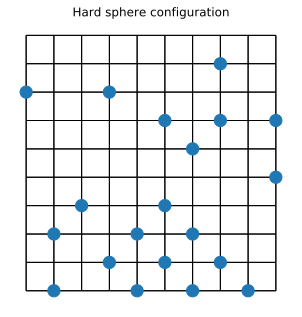

Number of occupied sites at T = 10000: 20


In [0]:
chain = HardSpheres(G)
T = 10000
_ = chain.sample(T)
chain.drawConfig()
print('Number of occupied sites at T = {}: {}'.format(T,chain.sum()))

We are interested in the average number of occupied sites and let $f(\cdot)$ be the number of occupied sites. 

We start from the current configuration, run the chain $T$ steps and compute 

$$
\frac{1}{T} \sum_{t = 1}^T f(X_T) \approx \mathbb{E}_\pi f.
$$


In [0]:
%%time
T = 100000
sumlist = chain.sample(T)
print('Average number of occupied sites: {:.2f}'.format(np.mean(np.array([sumlist]))))

Average number of occupied sites: 23.71
CPU times: user 602 ms, sys: 2.76 ms, total: 604 ms
Wall time: 604 ms


We repeat this 10 times.

In [0]:
%%time
for b in range(10):
    T = 100000
    sumlist = chain.sample(T)
    print('Average number of occupied sites: {:.2f}'.format(np.mean(np.array([sumlist]))))

Average number of occupied sites: 23.81
Average number of occupied sites: 23.66
Average number of occupied sites: 23.36
Average number of occupied sites: 23.75
Average number of occupied sites: 23.83
Average number of occupied sites: 23.72
Average number of occupied sites: 23.73
Average number of occupied sites: 23.91
Average number of occupied sites: 23.59
Average number of occupied sites: 23.53
CPU times: user 5.96 s, sys: 12.5 ms, total: 5.97 s
Wall time: 5.98 s


### Variation

For $t = 1, \ldots$

- select a site uniformly at random 
- flip the bit at the site 
- accept move if configuration is feasible

We have seen in class that this iteration can be cast as a Metropolis algorithm. 






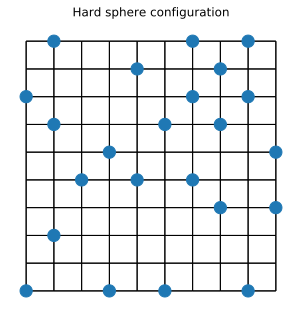

Number of occupied sites at T = 10000: 23


In [0]:
chain = HardSpheres(G)
T = 10000
_ = chain.sample(T,accept='hard')
chain.drawConfig()
print('Number of occupied sites at T = {}: {}'.format(T,chain.sum()))

In [0]:
%%time
for b in range(10):
    T = 100000
    sumlist = chain.sample(T,accept='hard')
    print('Average number of occupied sites: {:.2f}'.format(np.mean(np.array([sumlist]))))

Average number of occupied sites: 23.69
Average number of occupied sites: 23.65
Average number of occupied sites: 23.61
Average number of occupied sites: 23.47
Average number of occupied sites: 23.63
Average number of occupied sites: 23.83
Average number of occupied sites: 23.63
Average number of occupied sites: 23.57
Average number of occupied sites: 23.70
Average number of occupied sites: 23.52
CPU times: user 6.06 s, sys: 16.7 ms, total: 6.08 s
Wall time: 6.09 s


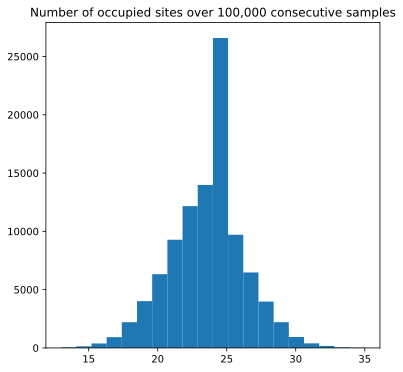

In [0]:
plt.rcParams["figure.figsize"] = (6,6)
plt.hist(sumlist,bins=20)
plt.title('Number of occupied sites over 100,000 consecutive samples')
plt.show()